In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [19]:
SLEEP_STAGES = ["W", "N1", "N2", "N3", "REM"]

In [20]:
s = """
[[115  31  17   2   0]
 [ 12  46  49   0  12]
 [  4  12 337  11   9]
 [  1   0  60 117   0]
 [  1  14  59   0  45]]
 [[ 83  16  16   0   0]
 [  8  42  92   0   2]
 [ 25  17 274   7   0]
 [  1   0  62 134   0]
 [  4  12  91   0  55]]
 [[ 50  14  12   5   1]
 [  2  34  23   0  14]
 [  0  11 242   6   4]
 [  0   0  64 224   0]
 [  1  17  67   1  32]]
 [[ 55  60  40   0   2]
 [  4  65  55   0  10]
 [  1  11 198   1   7]
 [  0   0  81  77   0]
 [  3  41  58   0  25]]
[[141  87  46   1  27]
 [  4  28  21   0  19]
 [  1  12 269   0  12]
 [  0   0  77 117   1]
 [  2  15  26   1  37]]
 [[ 59  10   6   3   0]
 [ 14  62  60   0   0]
 [ 10  10 248  27   1]
 [  2   0  43 202   0]
 [  7  20  49   0  20]]
 [[132   0  76  13   1]
 [  2   6  53   0   7]
 [  0   1 130  29   1]
 [  0   0  36 226   0]
 [  3   0  73   6  19]]
"""

In [21]:
processed_string = s.replace('[', '').replace(']', '').strip()
rows = [list(map(int, row.split())) for row in processed_string.splitlines()]
array_3d = np.array(rows).reshape(-1, 5, 5)  #
result = np.sum(array_3d, axis=0)

In [22]:
result = np.array(result, dtype=np.int32)
result

array([[ 635,  218,  213,   24,   31],
       [  46,  283,  353,    0,   64],
       [  41,   74, 1698,   81,   34],
       [   4,    0,  423, 1097,    1],
       [  21,  119,  423,    8,  233]], dtype=int32)

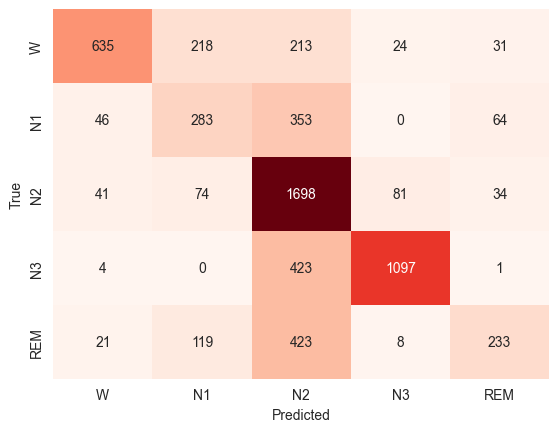

In [23]:
sns.heatmap(
    pd.DataFrame(result),
    cmap="Reds",
    annot=True,
    xticklabels=SLEEP_STAGES,
    yticklabels=SLEEP_STAGES,
    fmt='g',
    cbar=False
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("1.png")

In [24]:
TP = np.diag(result)
FP = np.sum(result, axis=0) - TP
FN = np.sum(result, axis=1) - TP
TN = np.sum(result) - (TP + FP + FN)

print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): [ 635  283 1698 1097  233]
False Negatives (FN): [486 463 230 428 571]


In [25]:
accuracy = np.sum(TP) / np.sum(result)

# Precision, Recall, F1-Score for each class
precision = TP / (TP + FP)  # Avoid division by zero
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Average Precision, Recall, F1-Score
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)

# Print the results
print("Accuracy:", accuracy)
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-Score for each class:", f1_score)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)

Accuracy: 0.6443500979751796
Precision for each class: [0.85006693 0.40778098 0.54598071 0.90661157 0.64187328]
Recall for each class: [0.56645852 0.37935657 0.88070539 0.71934426 0.289801  ]
F1-Score for each class: [0.67987152 0.39305556 0.67407701 0.80219378 0.39931448]
Average Precision: 0.670462694022344
Average Recall: 0.5671331478109488
Average F1-Score: 0.5897024712882216


In [26]:
sensitivity = TP / (TP + FN)

# Specificity is TN / (TN + FP)
specificity = TN / (TN + FP)

# Average Sensitivity and Specificity
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)

# Print the results
print("Sensitivity for each class:", sensitivity)
print("Specificity for each class:", specificity)
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)

Sensitivity for each class: [0.56645852 0.37935657 0.88070539 0.71934426 0.289801  ]
Specificity for each class: [0.97761343 0.92357754 0.66348904 0.97542944 0.97556391]
Average Sensitivity: 0.5671331478109488
Average Specificity: 0.9031346716389324
